In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
final.head()

,title,year,classification,duration,genre,rating,directors,stars,gross
0,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2722716
1,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2416686
2,The Matrix,1999,R,136,"Action, Sci-Fi",8.7,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1960545
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178,"Action, Adventure, Drama",8.8,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1918130
4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1889542


In [12]:
final.describe()

,year,duration,rating,gross
count,8637.000000,8637.000000,8637.000000,8.637000e+03
mean,2001.779206,110.486627,6.636263,9.674763e+04
std,17.822825,22.028061,0.974896,1.752927e+05
min,1915.000000,45.000000,1.200000,5.574000e+03
25%,1995.000000,96.000000,6.100000,1.870700e+04
50%,2007.000000,106.000000,6.700000,3.719200e+04
75%,2014.000000,120.000000,7.300000,9.708000e+04
max,2023.000000,467.000000,9.300000,2.749949e+06


In [13]:
len(final)

8637

## Perguntas:

- Estatísticas sobre o ano de estreia do filme
- Estatísticas sobre a classificação do filme
- Estatísticas sobre o rating do filme (qual filme com pior rating? e melhor? Qual o rating médio? Como se distribui esse rating?)
- Qual o orçamento médio dos filmes? Filmes melhor avaliados tem um orçamento maior?
- Quais os gêneros mais listados?
- Quais os diretores mais listados? Quais os diretores mais listados em ratings bons? E em ratings ruins?
- Quais as estrelas mais listadas? Quais as estrelas mais listadas em ratings bons? E em ratings ruins?
- Quais os filmes mais bem avaliados por gênero? E mais mal avaliados?

## Estatísticas sobre o ano de estreia do filme

In [18]:
num_of_years_to_visualize = 20

Text(0.5, 1.0, '20 years with more movies')

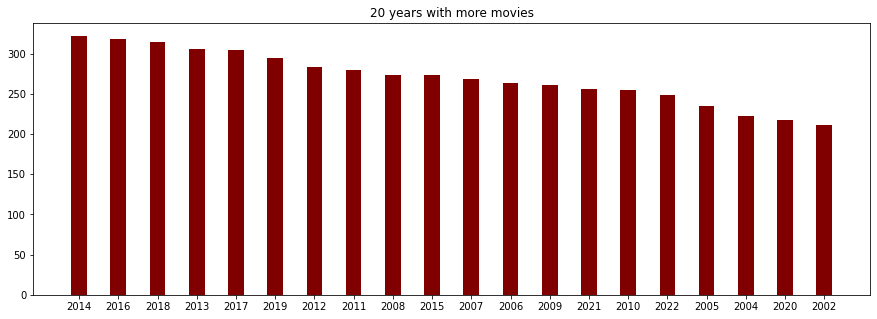

In [19]:
years = list(final.year.value_counts()[:num_of_years_to_visualize].keys())
counts = list(final.year.value_counts()[:num_of_years_to_visualize].values)

fig = plt.figure(figsize = (15, 5))
plt.bar(years, counts, color ='maroon', width = 0.4)
plt.title(f"{num_of_years_to_visualize} years with more movies")

In [20]:
final['year'] = final['year'].apply(lambda x: int(x))

In [21]:
print(f"Mean year = {final.year.mean()}")
print(f"Median year = {final.year.median()}")

Mean year = 2001.984768731101
Median year = 2007.0


Text(0.5, 1.0, 'Boxplot plot of year distribution')

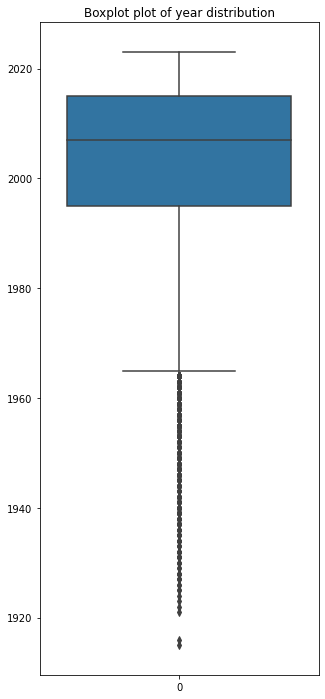

In [22]:
years = final.year.tolist()
fig = plt.figure(figsize = (5, 12))
sns.boxplot(years)
plt.title("Boxplot plot of year distribution")

## Estatísticas sobre a classificação do filme

In [2]:
classifications_dict = {
    'R': 'Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian',
    'PG': 'Parental Guidance, PG-rated content is not recommended for viewing by people under the age of 15 without guidance from parents, teachers or guardians.', 
    'PG-13': 'PARENTS STRONGLY CAUTIONED. Some material may be inappropriate for children under 13', 
    'G': 'Suitable for everyone', 
    'Passed': '', 
    'Not Rated': 'Restricted movies (generally)', 
    'Approved': 'Approved on the Hays Code', 
    '13+': 'Passed only for persons 13 and over (under 13 with adult)',
    'TV-14': 'Teens', 
    'TV-MA': 'Adult', 
    'NC-17': 'Adult', 
    'TV-PG': 'Kids', 
    'GP': 'All ages admitted – Parental guidance suggested', 
    '12': 'Contain material that is not generally suitable for children aged under 12', 
    'TV-G': 'Content that is suitable for all audiences', 
    '16+': 'Contain material that is not generally suitable for children aged under 16',
    '10': 'Contain material that is not generally suitable for children aged under 10', 
    '14': 'Contain material that is not generally suitable for children aged under 14', 
    'Livre': 'Suitable for everyone', 
    'MA-17': 'Not supposed to be watched by the children who are under the age of 17', 
    'TV-Y7': 'Programming is designed for children ages 7 and older', 
    '16': 'Contain material that is not generally suitable for children aged under 16', 
    'M/PG': 'M is given to films and games that can be shown to anyone but are more suitable for mature audiences', 
    '18': 'Contain material that is not generally suitable for children aged under 18', 
    'M': 'Mature',
    '18+': 'Contain material that is not generally suitable for children aged under 18', 
    'TV-Y7-FV': 'Fantasy violence', 
    'TV-13': 'Teens', 
    'X': 'Adults'
}

In [23]:
final = final[~final.classification.isna()]

In [24]:
final['classification'] = final['classification'].apply(lambda x: x.replace("Unrated", "Not Rated"))

In [25]:
num_of_classifications_to_visualize = 20

Text(0.5, 1.0, '20 classifications with more movies')

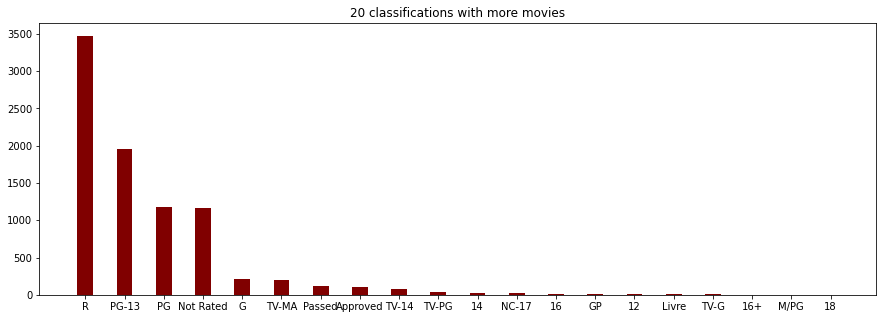

In [26]:
classifications = list(final.classification.value_counts()[:num_of_classifications_to_visualize].keys())
counts = list(final.classification.value_counts()[:num_of_classifications_to_visualize].values)

fig = plt.figure(figsize = (15, 5))
plt.bar(classifications, counts, color ='maroon', width = 0.4)
plt.title(f"{num_of_classifications_to_visualize} classifications with more movies")

## Estatísticas sobre o rating do filme (qual filme com pior rating? e melhor? Qual o rating médio? Como se distribui esse rating?)

In [27]:
final = final[~final.rating.isna()]

In [28]:
print(f"Mean rating = {final.rating.mean()}")
print(f"Median rating = {final.rating.median()}")

Mean rating = 6.637840027780992
Median rating = 6.7


Text(0.5, 1.0, 'Boxplot plot of rating distribution')

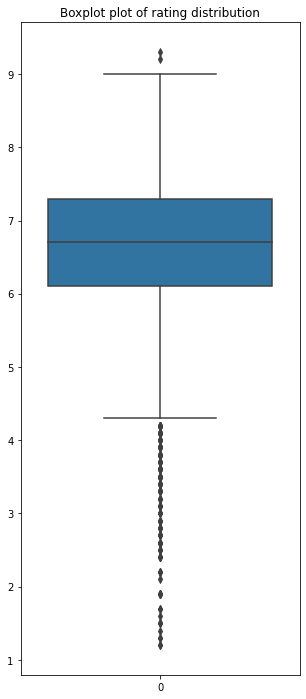

In [29]:
ratings = final.rating.tolist()
fig = plt.figure(figsize = (5, 12))
sns.boxplot(ratings)
plt.title("Boxplot plot of rating distribution")

In [30]:
print(f"Movie with best rating: {final[final.rating == final.rating.max()]['title'].values} -- Rating {final.rating.max()}")
print(f"Movie with worse rating: {final[final.rating == final.rating.min()]['title'].values} -- Rating {final.rating.min()}")

Movie with best rating: ['The Shawshank Redemption'] -- Rating 9.3
Movie with worse rating: ['Sadak 2' 'Daniel the Wizard'] -- Rating 1.2


## Qual o orçamento médio dos filmes? Filmes melhor avaliados tem um orçamento maior?

In [32]:
print(f"Mean gross = {final.gross.mean()}")
print(f"Median gross = {final.gross.median()}")

Mean gross = 96829.79743025813
Median gross = 37245.0


Text(0.5, 1.0, 'Boxplot plot of gross distribution')

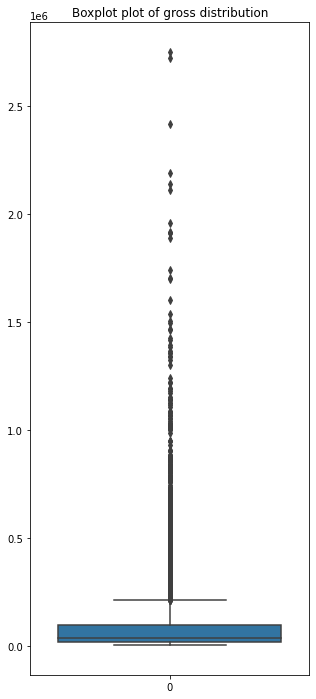

In [34]:
gross = final.gross.tolist()
fig = plt.figure(figsize = (5, 12))
sns.boxplot(gross)
plt.title("Boxplot plot of gross distribution")

Text(0.5, 1.0, 'Correlation matrix')

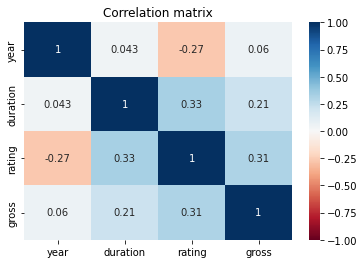

In [116]:
corr = final.corr()
sns.heatmap(corr, center=0.0, annot=True, vmin=-1, vmax=1, cmap='RdBu')
plt.title("Correlation matrix")

## Quais os gêneros mais listados?

In [50]:
genres = final.genre.tolist()
genres = [g for genre in genres for g in genre.split(', ')]

In [53]:
set_genres = set(genres)
dict_genres = {}
for genre in set_genres:
    dict_genres[genre] = genres.count(genre)

In [62]:
dict_genres_ordered = dict(sorted(dict_genres.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Most cited movie genres')

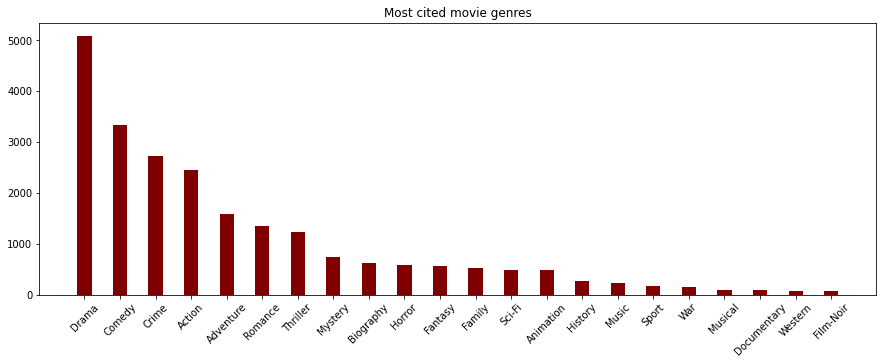

In [68]:
genres = list(dict_genres_ordered.keys())
counts = list(dict_genres_ordered.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(genres, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited movie genres")

## Quais os diretores mais listados? Quais os diretores mais listados em ratings bons? E em ratings ruins?

In [69]:
directors = final.directors.tolist()
directors = [d for director in directors for d in director.split(', ')]

In [71]:
set_directors = set(directors)
dict_directors = {}
for director in set_directors:
    dict_directors[director] = directors.count(director)

In [72]:
dict_directors_ordered = dict(sorted(dict_directors.items(), key=lambda x: x[1], reverse=True))

In [75]:
num_of_directors_to_visualize = 20

Text(0.5, 1.0, 'Most cited directors')

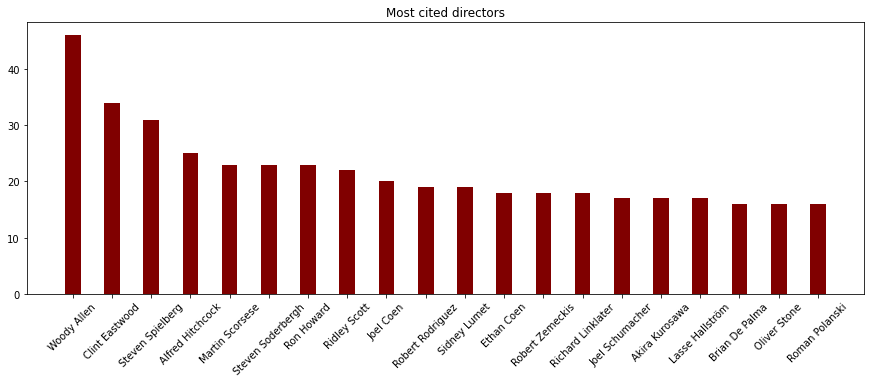

In [79]:
directors = list(dict_directors_ordered.keys())[:num_of_directors_to_visualize]
counts = list(dict_directors_ordered.values())[:num_of_directors_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(directors, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited directors")

#### Most cited directors with ratings > median

In [80]:
above_median = final[final.rating >= final.rating.median()]

In [82]:
directors = above_median.directors.tolist()
directors = [d for director in directors for d in director.split(', ')]

In [83]:
set_directors = set(directors)
dict_directors = {}
for director in set_directors:
    dict_directors[director] = directors.count(director)

In [84]:
dict_directors_ordered = dict(sorted(dict_directors.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Most cited directors')

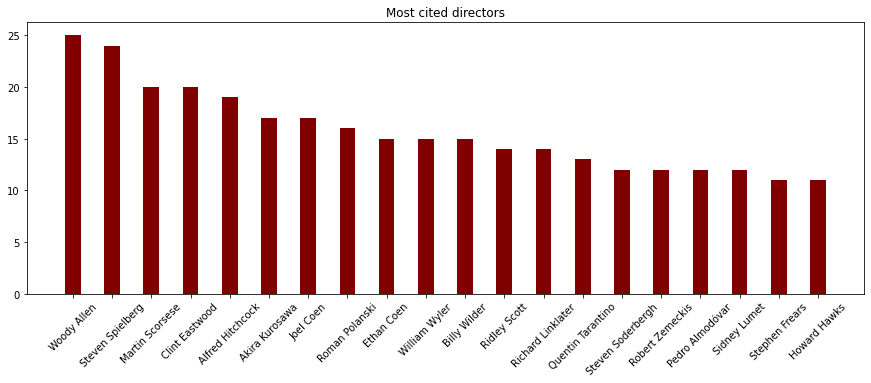

In [85]:
directors = list(dict_directors_ordered.keys())[:num_of_directors_to_visualize]
counts = list(dict_directors_ordered.values())[:num_of_directors_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(directors, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited directors among best rated movies")

#### Most cited directors with ratings < median

In [87]:
below_median = final[final.rating < final.rating.median()]

In [88]:
directors = below_median.directors.tolist()
directors = [g for director in directors for g in director.split(', ')]

In [89]:
set_directors = set(directors)
dict_directors = {}
for director in set_directors:
    dict_directors[director] = directors.count(director)

In [90]:
dict_directors_ordered = dict(sorted(dict_directors.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Most cited directors among worse rated movies')

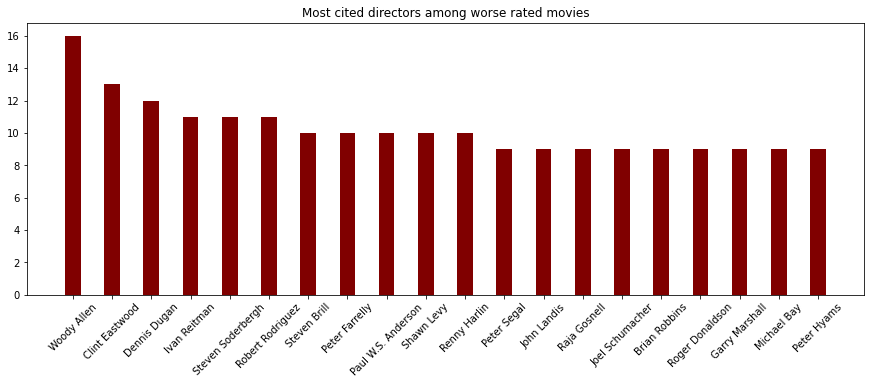

In [91]:
directors = list(dict_directors_ordered.keys())[:num_of_directors_to_visualize]
counts = list(dict_directors_ordered.values())[:num_of_directors_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(directors, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited directors among worse rated movies")

## Quais as estrelas mais listadas? Quais as estrelas mais listadas em ratings bons? E em ratings ruins?

In [93]:
stars = final.stars.tolist()
stars = [s for star in stars for s in star.split(', ')]

In [94]:
set_stars = set(stars)
dict_stars = {}
for star in set_stars:
    dict_stars[star] = stars.count(star)

In [95]:
dict_stars_ordered = dict(sorted(dict_stars.items(), key=lambda x: x[1], reverse=True))

In [97]:
num_of_stars_to_visualize = 20

Text(0.5, 1.0, 'Most cited stars')

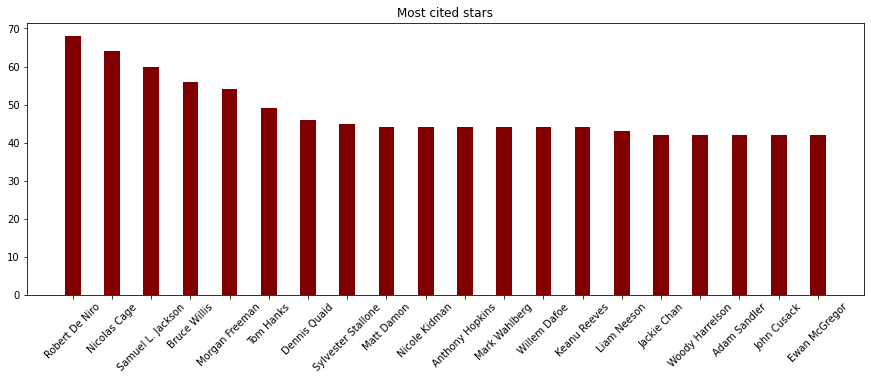

In [99]:
stars = list(dict_stars_ordered.keys())[:num_of_stars_to_visualize]
counts = list(dict_stars_ordered.values())[:num_of_stars_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(stars, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited stars")

#### Most cited directors with ratings > median

In [100]:
above_median = final[final.rating >= final.rating.median()]

In [101]:
stars = above_median.stars.tolist()
stars = [s for star in stars for s in star.split(', ')]

In [102]:
set_stars = set(stars)
dict_stars = {}
for star in set_stars:
    dict_stars[star] = stars.count(star)

In [103]:
dict_stars_ordered = dict(sorted(dict_stars.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Most cited stars among best rated movies')

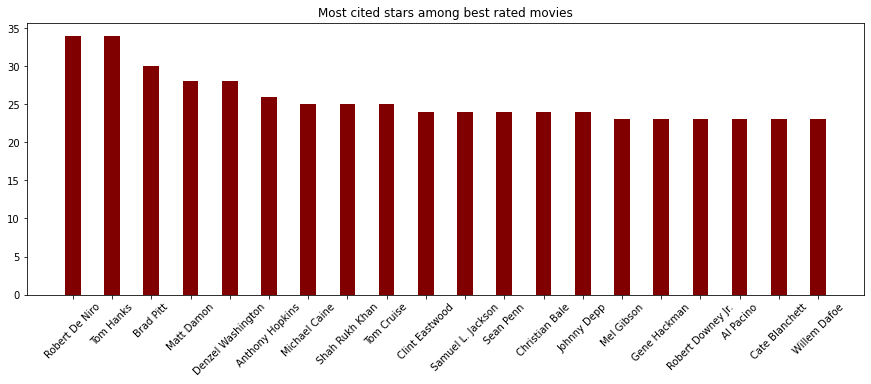

In [105]:
stars = list(dict_stars_ordered.keys())[:num_of_stars_to_visualize]
counts = list(dict_stars_ordered.values())[:num_of_stars_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(stars, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited stars among best rated movies")

#### Most cited directors with ratings < median

In [106]:
below_median = final[final.rating < final.rating.median()]

In [107]:
stars = below_median.stars.tolist()
stars = [s for star in stars for s in star.split(', ')]

In [108]:
set_stars = set(stars)
dict_stars = {}
for star in set_stars:
    dict_stars[star] = stars.count(star)

In [109]:
dict_stars_ordered = dict(sorted(dict_stars.items(), key=lambda x: x[1], reverse=True))

Text(0.5, 1.0, 'Most cited stars among worse rated movies')

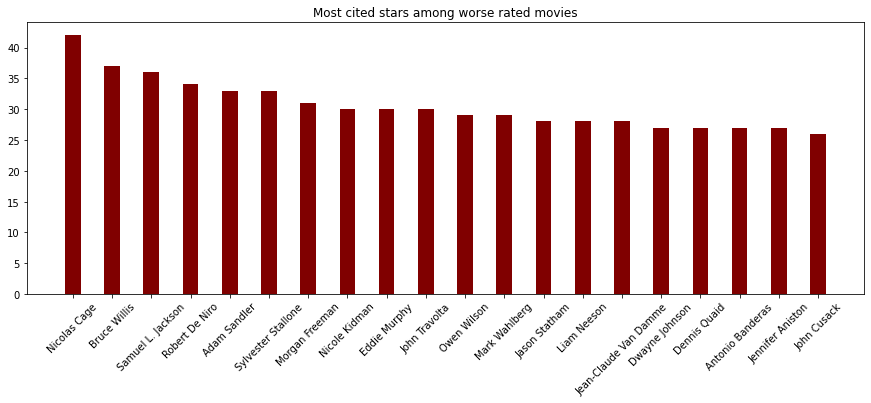

In [110]:
stars = list(dict_stars_ordered.keys())[:num_of_stars_to_visualize]
counts = list(dict_stars_ordered.values())[:num_of_stars_to_visualize]

fig = plt.figure(figsize = (15, 5))
plt.bar(stars, counts, color ='maroon', width = 0.4)
plt.xticks(rotation = 45)
plt.title("Most cited stars among worse rated movies")

In [7]:
### Mudança do rating com o passar dos anos
### df.describe()
### melhorar plot com anos